In [12]:
import rubin_sim
from rubin_sim import maf
%matplotlib inline
import healpy as hp
import numpy as np

In [2]:
# replace this with whatever file you want to use
baseline_file = rubin_sim.data.get_baseline()
runname = baseline_file.split('/')[-1].replace('.db', '')

In [3]:

# HEALpix nside. Needs to be 2 to some power. 
nside = 256

# Make a map over the whole sky
slicer = maf.HealpixSlicer(nside=nside)
# just count how many observations overlap the point
metric = maf.CountMetric(col='night')
# limit the data to just things on one night
sql='night=50'

bundle = maf.MetricBundle(metric, slicer, sql)

bg = maf.MetricBundleGroup([bundle], baseline_file, '.', None)


Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


In [4]:
# run it
bg.runAll()

Querying table None with constraint night=50 for columns ['fieldDec', 'fieldRA', 'night', 'rotSkyPos']
Found 709 visits
Running:  ['opsim_Count_night_night50_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "night=50" constraint now.


0.0 180.0 -180.0 180.0
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn(


Plotting complete.


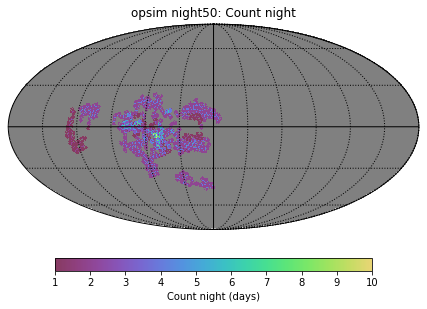

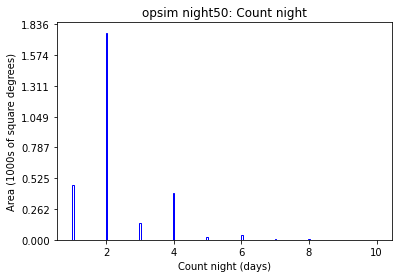

In [5]:
# plot it
bg.plotAll(closefigs=False)

In [6]:
# now we can dig out the HEALpix map that was created
bundle.metricValues

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=-1.6375e+30)

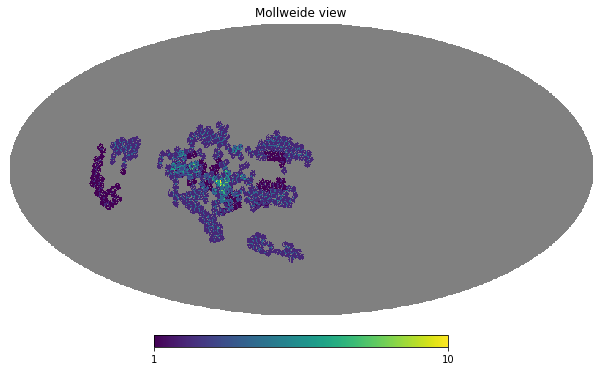

In [7]:
# Use a healpy tool to plot it.
hp.mollview(bundle.metricValues)

In [9]:
# healpy isn't great about following matplotlib conventions, so it might take some thinking about how
# to best draw more things on top of this, or convert the HEALpix map to something else and plot yourself.


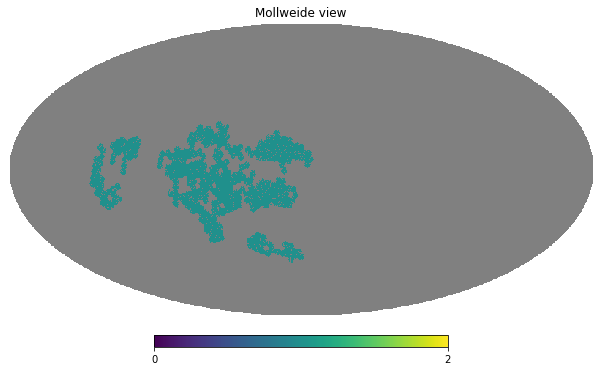

In [13]:
# Maybe you only care if something was observed at all
at_all = bundle.metricValues * 0
at_all[np.where(bundle.metricValues > 0)] += 1
hp.mollview(at_all)